# Principal Component Analysis


Lesson Goals

In this lesson we will learn how to reduce the dimensions of our data using a technique called PCA. We will learn the theory behind this technique as well as how to implement it in Python.
Introduction

PCA is a dimensionality reduction technique that is used to transform our data. What motivates us to reduce the dimensions of our data?

    We may want to speed up the performance of our model by providing it with less variables
    We may have many columns of very sparse data. By using PCA, we have fewer columns with less sparsity. This may improve the performance of our model

Creating less variables that are a function of our original data enables us to accomplish these goals.



# Dimension Reduction

In real life, we reduce the dimensions of things quite often while still maintaining most of the important information. For example, we are able to watch television and still understand the images even though they have been reduced from 3 dimensions to 2 dimensions. PCA is meant to reduce data such that we still retain a large amount of information about the data.



# PCA in Python

We will find the principal components in our data using the PCA function in statsmodels. In this example, we will be using a breast cancer dataset from the UCI data repository. This data contains 35 columns, we will retain 31 numeric columns and find the top 2 principal components of our data.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.multivariate.pca import  PCA

In [2]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']


breast_cancer = pd.read_csv('breast-cancer.csv', names=total_cols)
breast_cancer.head()

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


Now we will extract only the numeric columns and find the principal components using the PCA function. For this example, we will limit ourselves to only 2 components.

In [3]:
numeric_columns = [x for x in total_cols if x not in ['id', 'outcome', 'time', 'lymph_status']]

breast_cancer_numeric = breast_cancer[numeric_columns]

pca = PCA(np.array(breast_cancer_numeric), ncomp=2)
pca.factors.shape

(198, 2)

Let's see which columns are the significant ones with MinMaxScaler this time:

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import pylab as plt
%matplotlib inline

In [5]:
breast_mM = MinMaxScaler().fit_transform(breast_cancer_numeric)

breast_df= pd.DataFrame(breast_mM)
breast_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.434542,0.595848,0.413793,0.344948,0.285673,0.216883,0.210069,0.277738,0.321594,0.277177,...,0.620931,0.371176,0.273322,0.267183,0.140351,0.253067,0.336803,0.219200,0.171127,0.479167
1,0.432698,0.000000,0.461887,0.338594,0.622831,0.872621,0.685467,0.700923,0.641455,0.603094,...,0.020079,0.676411,0.445050,0.570687,0.610208,0.600269,0.904711,0.598462,0.418864,0.270833
2,0.640443,0.244291,0.595281,0.535586,0.192026,0.274543,0.252023,0.339930,0.591801,0.208731,...,0.131123,0.503059,0.424431,0.262208,0.291639,0.276976,0.666679,0.545831,0.233701,0.218750
3,0.028888,0.346021,0.051543,0.012974,0.968450,0.896363,0.539745,0.469291,0.744226,1.000000,...,0.299057,0.093610,0.017556,0.909020,0.809574,0.578454,0.874479,1.000000,0.773711,0.166667
4,0.574063,0.137024,0.573503,0.495340,0.363258,0.326927,0.432004,0.464315,0.289261,0.181818,...,0.000000,0.456152,0.314266,0.394413,0.152669,0.328109,0.510926,0.157500,0.142595,0.322917


Appliying PCA:

In [21]:
pca=PCA()
pca.fit(breast_df)
#pca.explained_variance_ratio_

PCA()

In [7]:
sum(pca.explained_variance_ratio_) #Almost 1 ;)

0.9999999999999999

In [8]:
sum(pca.explained_variance_ratio_[:2])#3 columns explain 60% of variance

0.6014582794594291

In [9]:
sum(pca.explained_variance_ratio_[:3]) #4 columns explain almost 70% of variance

0.6981847304671952

Let's see variance depending on the columns used:

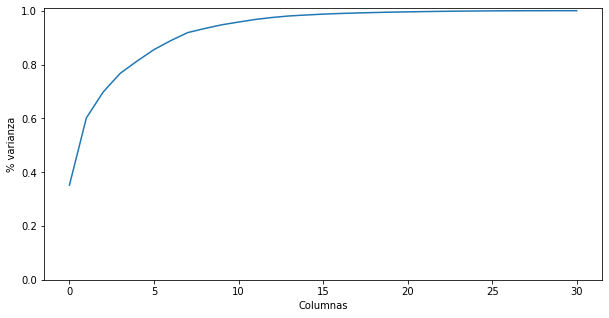

In [10]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Columnas')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [11]:
sum(pca.explained_variance_ratio_[:2])

0.6014582794594291

Standardizing:

In [12]:
def standardize(x): #function to standardize
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    return (x-mean)/std_dev   

In [13]:
breast_stdized = standardize(breast_cancer_numeric)
breast_stdized.shape

(198, 31)

In [16]:
breast_stdized_trans = breast_stdized.transpose()
breast_stdized_trans.shape

(31, 198)

In [25]:
breast_cancer_numeric.columns

Index(['cell_1_radius', 'cell_1_texture', 'cell_1_perimiter', 'cell_1_area',
       'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
       'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
       'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
       'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
       'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension',
       'cell_3_radius', 'cell_3_texture', 'cell_3_perimiter', 'cell_3_area',
       'cell_3_smoothness', 'cell_3_compactness', 'cell_3_concavity',
       'cell_3_concave_points', 'cell_3_symmetry', 'cell_3_fractal_dimension',
       'tumor_size'],
      dtype='object')

In [20]:
sns.features(['cell_1_radius', 'cell_1_texture', 'cell_1_perimiter', 'cell_1_area',
       'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
       'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
       'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
       'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
       'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension',
       'cell_3_radius', 'cell_3_texture', 'cell_3_perimiter', 'cell_3_area',
       'cell_3_smoothness', 'cell_3_compactness', 'cell_3_concavity',
       'cell_3_concave_points', 'cell_3_symmetry', 'cell_3_fractal_dimension',
       'tumor_size'], axis = 1)

IndexError: Inconsistent shape between the condition and the input (got (31, 1) and (31,))